# Visual Q&A Demo

## Setup
1-Adds required packages to Julia.   
2-Downloads sample data and a pretrained model. 

In [35]:
#you need to install development verisons of each required packages for now
include("demosetup.jl")
include("src/macnet.jl")

scalepixel (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
2-Loads the pretrained model.   

In [36]:
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,wrun,r,_,o = loadmodel("models/macnet.jld2";onlywrun=true)
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype,wrun);""
end;

Loading demo features ...
Loading demo questions ...
Loading dictionaries ...


┌ Warning: type Core.Void does not exist in workspace; reconstructing
└ @ JLD2 /Users/ekin/.julia/dev/JLD2/src/data.jl:1061


## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [37]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = atype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
answer==prediction[1]

true

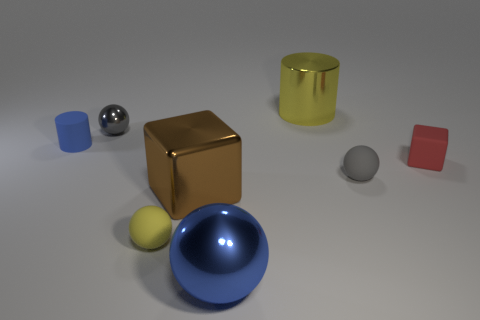

In [38]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [39]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: Is there a metal cylinder of the same size as the gray shiny thing ?
Answer: no
Prediction: no 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [42]:
userinput = readline(stdin)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> Is there a metal cylinder of the same size as the gray shiny thing ?
Question: Is there a metal cylinder of the same size as the gray shiny thing ?
Prediction: no


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

Top-3 Attended Words:
("?", "18.75%")
("of", "12.84%")
("the", "12.39%")
Image Attention Map: 


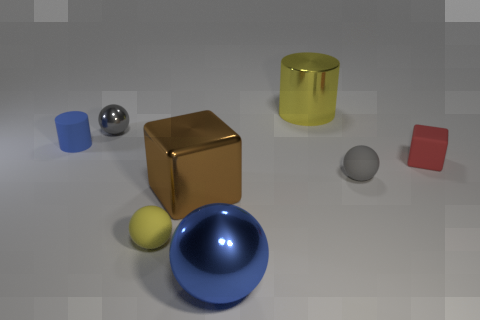

Top-3 Attended Words:
("a", "21.28%")
("metal", "18.14%")
("there", "12.06%")
Image Attention Map: 


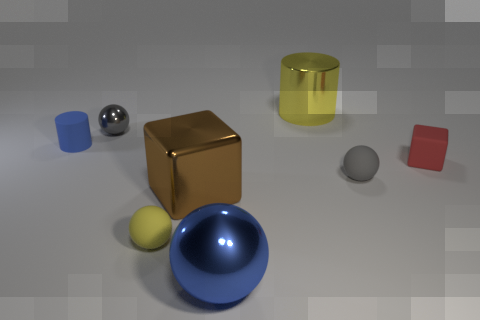

Top-3 Attended Words:
("?", "41.25%")
("there", "21.20%")
("as", "10.27%")
Image Attention Map: 


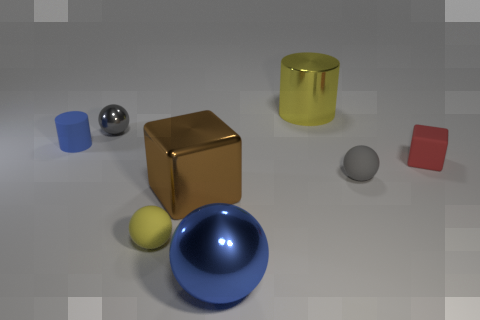

Top-3 Attended Words:
("?", "79.44%")
("there", "5.11%")
("thing", "3.61%")
Image Attention Map: 


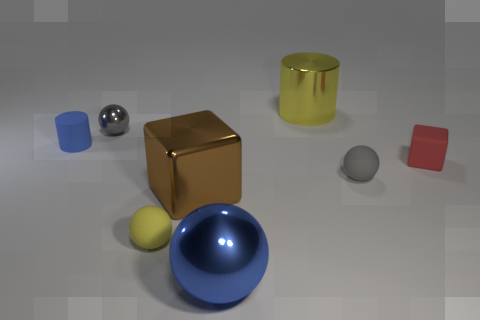

Top-3 Attended Words:
("?", "23.87%")
("as", "12.39%")
("there", "9.96%")
Image Attention Map: 


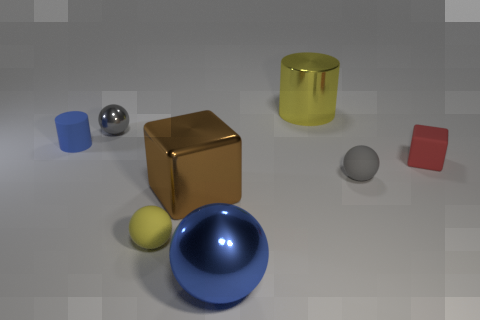

Top-3 Attended Words:
("there", "19.35%")
("?", "18.21%")
("a", "17.93%")
Image Attention Map: 


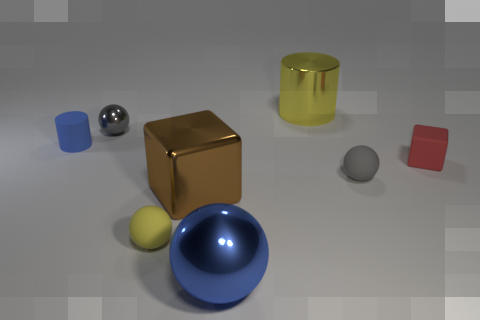

Top-3 Attended Words:
("gray", "71.86%")
("the", "15.33%")
("shiny", "8.19%")
Image Attention Map: 


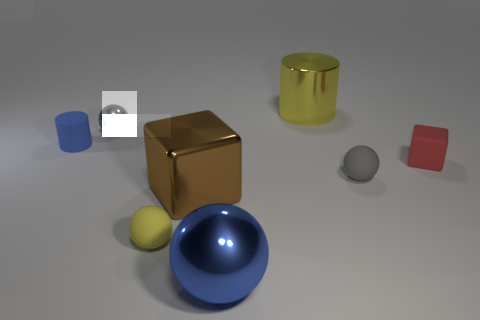

Top-3 Attended Words:
("same", "29.61%")
("size", "23.89%")
("Is", "8.47%")
Image Attention Map: 


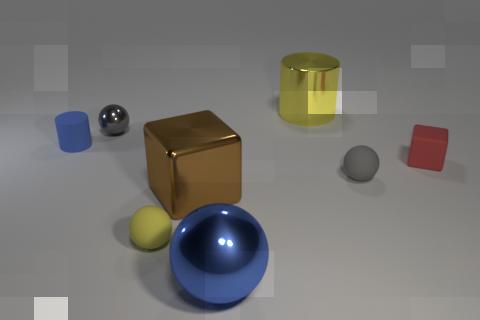

Top-3 Attended Words:
("metal", "74.42%")
("a", "10.91%")
("cylinder", "7.50%")
Image Attention Map: 


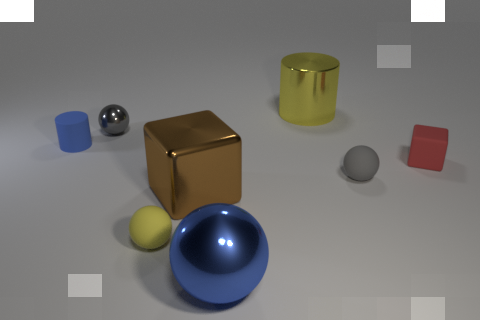

Top-3 Attended Words:
("Is", "37.53%")
("there", "7.89%")
("same", "7.72%")
Image Attention Map: 


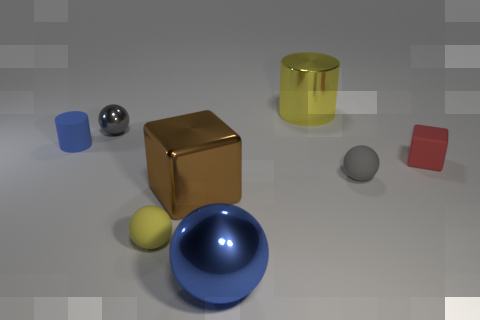

Top-3 Attended Words:
("there", "28.19%")
("a", "15.90%")
("Is", "15.83%")
Image Attention Map: 


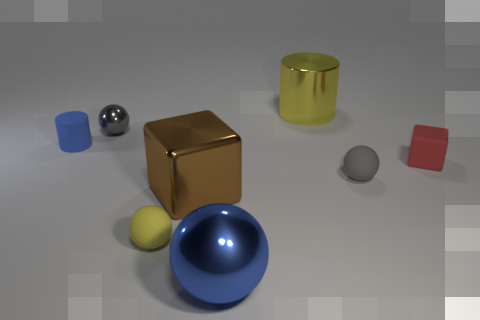

Top-3 Attended Words:
("?", "63.13%")
("there", "18.08%")
("a", "8.13%")
Image Attention Map: 


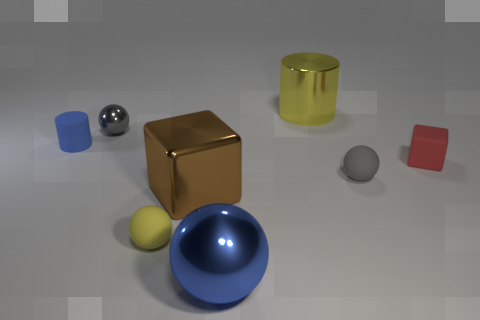

In [43]:
visualize(img,results;p=o[:p])